In [3]:
import numpy as np
import matplotlib.pyplot as pl

Testing the Forwards Euler method for dy / dx = - 2 * x * y - 3 * x**2


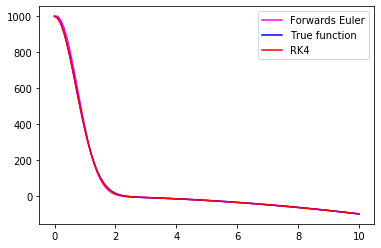

In [19]:
#TASK A / 1

#Defining the function f(x,y) = dy/dx

def f(x, y): #Change dy/dx here
    a = - 2 * x * y - 2 * x**3
    return a

#FORWARDS EULER METHOD FOR SOLVING ODE-S

def forwardEuler(y_0, h, x_n): #Where y_0 is the initial condition, h is the stepsize, and x_n is the last point to which we want to find the solution
    xn = np.arange(0, x_n + h, h) #If the initial condition don't start in x = 0 then rewrite this line
    yn = [y_0] #Creating yn and adding the first node that we know
    
    for i in range(len(xn)-1):
        y_ = yn[i] + h * f(xn[i],yn[i]) 
        yn.append(y_)
    
    return xn, yn

#Testing the function:

print("Testing the Forwards Euler method for dy / dx = - 2 * x * y - 3 * x**2")

x, y = forwardEuler(1000, 0.1, 10)

pl.plot(x,y,c = 'magenta')

#Caclulating the analitical solution to see if it worked well

xtrue = np.arange(0, 10.1, 0.1)
ytrue = []

for x in xtrue:
    ytrue.append(1-x**2+(1000-1)*np.exp(-x**2))
    
pl.plot(xtrue,ytrue,c = 'blue')

#_________________________________________________________________________________________________________________________


#TASK A / 2

#RK4 METHOD

def RK4(y_0, h, x_n):
    xn = np.arange(0, x_n + h, h) #If the initial condition don't start in x = 0 then rewrite this line
    yn = [y_0] #Creating yn and adding the first node that we know
    
    for i in range(len(xn)-1):
        k1 = h * f(xn[i], yn[i]) 
        k2 = h * f(xn[i] + h/2, yn[i] + k1/2)
        k3 = h * f(xn[i] + h/2, yn[i] + k2/2)
        k4 = h * f(xn[i] + h, yn [i] + k3)
        y_ = yn[i] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        yn.append(y_)
    
    return xn, yn

#Testing the RK4 Method

x, y = RK4(1000, 0.1, 10)

pl.plot(x, y, c = 'red')


pl.legend(['Forwards Euler','True function','RK4'])

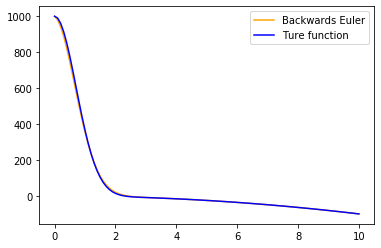

In [33]:
#TASK B

#BACKWARD EULER METHOD FOR SOLVING DIFERENTIAL EQUATIONS (NOTE: THIS IS AN IMPLICIT METHOD AND I HAVE NO IDEA HOW TO CODE THE EQUATION REARRANGING SO YOU'LL HAVE TO DO IT BY HAD AND THEN PLUG IT IN THE CODE HERE)

def backwardsEuler(y_0, h, x_n):
     xn = np.arange(0, x_n + h, h) #If the initial condition don't start in x = 0 then rewrite this line
     yn = [y_0] #Creating yn and adding the first node that we know
    
     for i in range(len(xn)-1):
        y_ = (yn[i] - 2 * h * xn[i+1]**3) / (1 + 2 * h * xn[i+1]) #This part was done by hand
        
        yn.append(y_)
    
     return xn, yn
    

#Testing the Backwards Euler implicit function 

x,y = backwardsEuler(1000, 0.1, 10)

pl.plot(x,y, c = 'orange')


#Caclulating the analitical solution to see if it worked well

xtrue = np.arange(0, 10.1, 0.1)
ytrue = []

for x in xtrue:
    ytrue.append(1-x**2+(1000-1)*np.exp(-x**2))
    
pl.plot(xtrue,ytrue,c = 'blue')
pl.legend(['Backwards Euler', 'Ture function'])

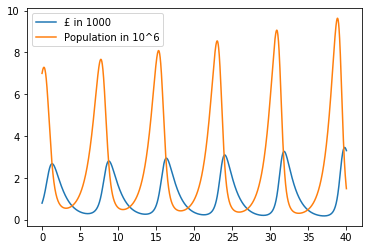

In [55]:
#TASK C

#Defining the two functions that gicve the system of ODE-s describing houseprices in London

#Defining the first differential equation in the system: y1/dx = f1(x, y1, y2)
def f1(x, y1, y2): #Change dy/dx here
    a = 0.3 * y1 * y2 - 0.8 * y1
    return a

#Defining the second differential equation in the system: y2/dx = f2(x, y1, y2)
def f2(x,y1, y2):
    a = 1.1 * y2 - y2 * y1
    return a

#FORWARDS EULER METHOD TO SOLVING A SYSTEM OF 2 ODE-S (Not neccesarily linear)

def SystemOf2ODEs(y1_0, y2_0, x_n, h):
    #Defining the arrays that will hold the nodes
    xn = np.arange(0, x_n + h, h) #This assumes that x_0 = 0
    y1 = [y1_0]
    y2 = [y2_0]
    
    #Solving the ODE-s
    
    for i in range(len(xn)-1):
        y1_ = y1[i] + h * f1(xn[i], y1[i], y2[i]) #Forwards Euler
        y2_ = y2[i] + h * f2(xn[i], y1[i], y2[i]) 
        y1.append(y1_)
        y2.append(y2_)
    
    return xn, y1, y2


x, y1, y2 = SystemOf2ODEs(0.8, 7, 40, 0.019)



pl.plot(x, y1)
pl.plot(x, y2)
pl.legend(['£ in 1000','Population in 10^6'])

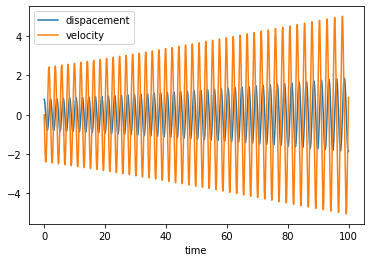

In [54]:
#TASK D

#Defining the system of linear equations that define the damped non-linear motion of a pendulum

#Defining the first differential equation in the system: y1/dx = f1(x, y1, y2)
def f1(x, y1, y2): #Change dy/dx here
    a = y2
    return a

#Defining the second differential equation in the system: y2/dx = f2(x, y1, y2)
def f2(x,y1, y2):
    a = -0.0/0.5 * y2 - 9.81/1 * np.sin(y1) #With symbols: -c/m * y[1] - g/L * np.sin(y[0]) Also try with c = 0.18 and c = 0 where we will have a problem
    return a

#FORWARDS EULER METHOD TO SOLVING A SYSTEM OF 2 ODE-S (Not neccesarily linear)

def SystemOf2ODEs(y1_0, y2_0, x_n, h):
    #Defining the arrays that will hold the nodes
    xn = np.arange(0, x_n + h, h) #This assumes that x_0 = 0
    y1 = [y1_0]
    y2 = [y2_0]
    
    #Solving the ODE-s
    
    for i in range(len(xn)-1):
        y1_ = y1[i] + h * f1(xn[i], y1[i], y2[i]) #Forwards Euler
        y2_ = y2[i] + h * f2(xn[i], y1[i], y2[i]) 
        y1.append(y1_)
        y2.append(y2_)
    
    return xn, y1, y2

x, y1, y2 = SystemOf2ODEs(np.pi/4, 0, 100, 0.002)

pl.plot(x,y1)
pl.plot(x,y2)
pl.xlabel('time')
pl.legend(['dispacement', 'velocity'])

print('Notice that here if we only using the forward Euler method with c = 0 (as you see here now) we get a positive error thats getting larger and larger. This means that we shall have the pendulum gaining energy. Ill fix this in the next part')

In [ ]:
#FIXING TASK D

print('To overcome the issue we will do the same as in tutorial sheet 7 but with this new, better function and we will apply the Euler-Cromer method. Essentially this uses a forward Euler on one and a backwards Euler on the other')

#NOTE: This is possible to do generally like this, however some rearranging would have to be done each time if it's not linear. If it is then we can just use the fuction that I wrote for Tutorial Sheet 7